In [1]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam




2024-04-17 11:36:49.123224: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
num_classes = 39
img_rows, img_cols = 38, 38
batch_size = 64  # Increase batch size for faster training

train_data_dir = '/Users/houssam/Downloads/car_make_images/train'
validation_data_dir = '/Users/houssam/Downloads/car_make_images/test'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Rescaling for the validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

# Training generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',  # Change to categorical for multi-class classification
    shuffle=True)

# Validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_rows, img_cols),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',  # Change to categorical for multi-class classification
    shuffle=False)  # No need to shuffle the validation data



Found 11570 images belonging to 39 classes.
Found 2870 images belonging to 39 classes.


In [4]:
# Model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(img_rows, img_cols, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Increase dropout for regularization

model.add(Dense(num_classes, activation='softmax'))  # Change to softmax for multi-class classification



In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 36, 36, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 36, 36, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 18, 18, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 64)        256       
 chNormalization)                                                
                                                        

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Updated number of samples for training and validation
nb_train_samples = len(train_generator.classes)
nb_validation_samples = len(validation_generator.classes)

# Training
epochs = 20
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)


Epoch 1/20
 51/181 [=======>......................] - ETA: 1:47 - loss: 3.9584 - accuracy: 0.0323

In [12]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# # Training
# epochs = 20  # Increase the number of epochs if needed
# history = model.fit(
#     train_generator,
#     steps_per_epoch=nb_train_samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=nb_validation_samples // batch_size),
#     callbacks=[lr_schedule, early_stopping]



RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [16]:
# Save the trained model if needed
model.save("asl_model.h5")

/Users/houssam/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


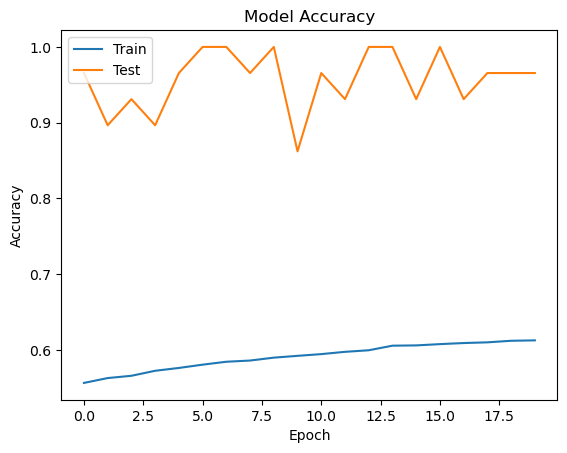

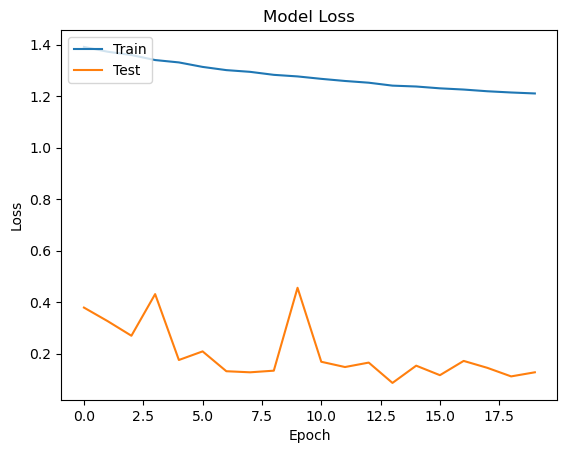

In [15]:
#### Data Visualization

import matplotlib.pyplot as plt

# Assuming 'history' is your training history object
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# For loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

classifier = load_model('asl_model.h5')

In [2]:
import cv2
import numpy as np

# Assuming 'classifier' is your loaded Keras model
# Replace 'classifier' with the actual name you used to load the model

# Mapping between class indices and alphabet labels
alphabet_mapping = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'SPACE', 'DELETE', 'NOTHING']

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    ##############################
    frame = cv2.flip(frame, 1)

    # Define region of interest
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)
    
    roi = roi.reshape(1, 28, 28, 1) 
    roi = roi / 255

    # Use the predict method to get probabilities
    probabilities = classifier.predict(roi)
    
    # Find the class with the highest probability
    predicted_class = np.argmax(probabilities)
    
    # Get the corresponding alphabet label
    alphabet_label = alphabet_mapping[predicted_class]
    
    cv2.putText(copy, alphabet_label, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    if cv2.waitKey(1) == 13:  # 13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()


Changed waitThread to realtime priority!
Asked for all format descriptions...
1/1 [==============================] - 0s 16ms/step
